In [1]:
import warnings
warnings.filterwarnings('ignore')
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4476    0  4476    0     0   8391      0 --:--:-- --:--:-- --:--:--  8382
100  517k  100  517k    0     0   276k      0  0:00:01  0:00:01 --:--:--  719k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4472    0  4472    0     0  10410      0 --:--:-- --:--:-- --:--:-- 10424
100  392k  100  392k    0     0   345k      0  0:00:01  0:00:01 --:--:--  611k


In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as pl
import seaborn as sns
import pandas as pd
import datetime
import yfinance as yahoofin
from talib import SMA, EMA

In [9]:
#Data Entry
startDate = datetime.datetime(2013, 1, 1)
endDate = datetime.datetime(2023, 12, 30)
company = "MSFT"
#INTC, CRM, NVDA, AMZN

data = yahoofin.Ticker(company).history(start = startDate, end=endDate)
data_close = data['Close']

In [13]:
EMA_10 = EMA(data_close, timeperiod=10)
EMA_50 = EMA(data_close, timeperiod=50)
results = pd.DataFrame({'Close': data_close, "EMA_10": EMA_10, "EMA_50":EMA_50})

<Axes: xlabel='Date'>

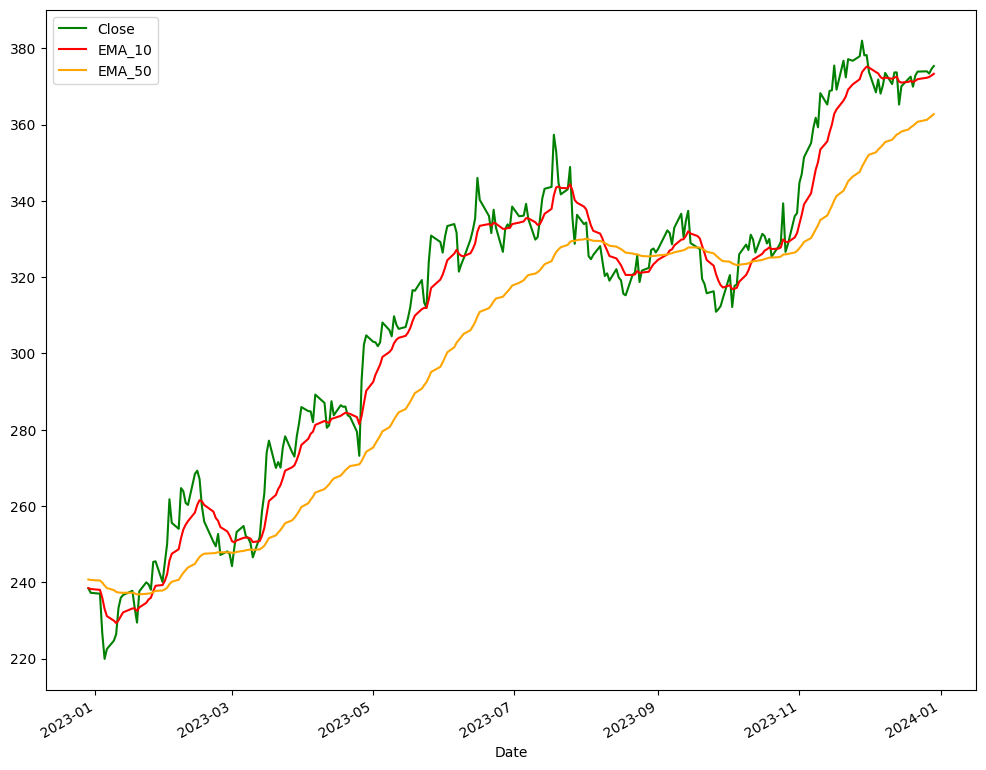

In [16]:
results.tail(252).plot(figsize=(12,10), color=['green','red','orange'])

In [17]:
def SignalGeneration(prices):

  if 'Buy_Signal' not in prices.columns:
    prices['Buy_Signal'] = 0

  for i in range(0, len(prices)):
    if prices['EMA_10'] >= prices['EMA_50']:
      prices['Buy_Signal'][i]=1

  return prices

In [20]:
if 'Buy_Signal' not in results.columns:
  results['Buy_Signal'] = 0

In [29]:
for i in range(51, len(results)):
  if results["EMA_10"][i] >= results['EMA_50'][i]:
    results['Buy_Signal'][i] = 1

In [34]:
results["Daily_Returns"] = (np.log(results['Close']/ results['Close'].shift(1)))

In [39]:
results["strategy_return"] = results["Daily_Returns"]*results["Buy_Signal"]


In [41]:
print(results["strategy_return"].sum())

2.507886261249179


In [42]:
print(np.log(results["Close"][-1]/results["Close"][51]))

2.78739905835541


In [44]:
print(np.exp(2.5078))

12.277888970482891
